<a href="https://colab.research.google.com/github/ShahdTarek/News-Classification/blob/main/News_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.corpus import stopwords


from sklearn.model_selection import train_test_split
from collections import Counter
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from wordcloud import STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=74cafdbc360820e082920e0bd53deacdd3e636a088d85d4507250a3b5b3107d7
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [ ]:
!pip install -q streamlit

In [ ]:
!conda install spacy
!python -m spacy.en.download
!python -c "import spacy; spacy.load('en')"

/bin/bash: conda: command not found
2023-05-16 12:06:06.301417: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-16 12:06:07.790812: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/bin/python3: Error while finding module specification for 'spacy.en.download' (ModuleNotFoundError: No module named 'spacy.en')
2023-05-16 12:06:15.748240: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-16 12:06:16.874338: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38]

In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=7ae9aefd2faf38338c7b474c72a57da1968d3a0042b6c4ec1d2dfd36b37d5b09
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


# Data import

In [ ]:

bbc_text = pd.read_csv('/content/bbc-text.csv')
bbc_text=bbc_text.rename(columns = {'text': 'News_Headline'}, inplace = False)
bbc_text.head()

,category,News_Headline
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
bbc_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category       1370 non-null   object
 1   News_Headline  1370 non-null   object
dtypes: object(2)
memory usage: 21.5+ KB


# Visualization

<ipython-input-8-cb2496571bbd>:6: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


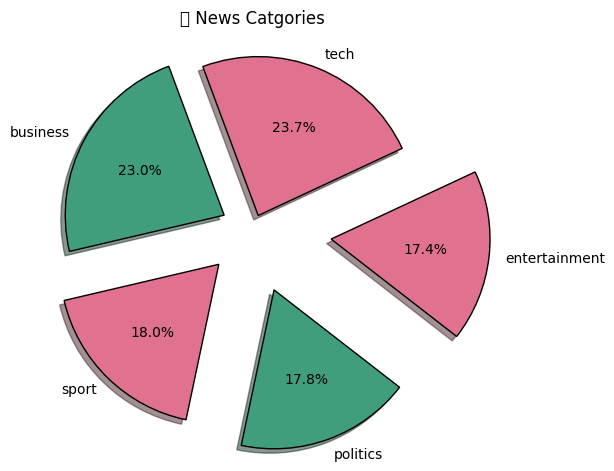

In [ ]:
colors = ['#E1728F', '#409E7D']
plt.pie(bbc_text['category'].value_counts(),  explode=[0.1, 0.2, 0.3, 0.4, 0.5], labels=['tech', 'business', 'sport', 'politics','entertainment' ],
        autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, shadow=True, startangle=25,
        colors=colors)
plt.title('\t News Catgories')
plt.tight_layout()
plt.show()

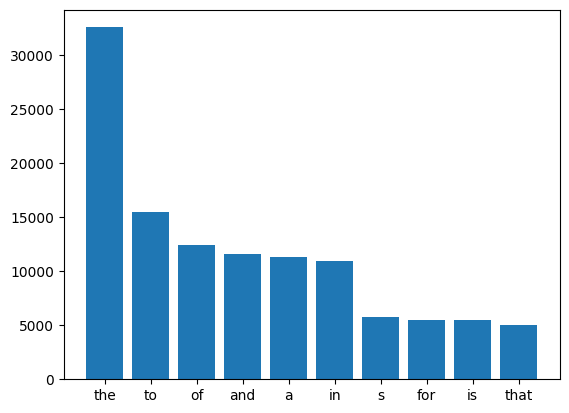

In [ ]:
def plot_stopwords(data):
    stop=set(stopwords.words('english'))
    data_split= data.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    from collections import defaultdict
    dictionary_stopwords=defaultdict(int)
    for word in corpus:
        if word in stop:
            dictionary_stopwords[word]+=1

    top=sorted(dictionary_stopwords.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)
plot_stopwords(bbc_text['News_Headline'])

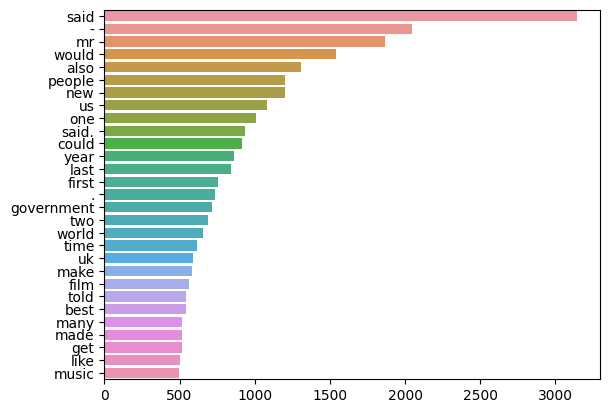

In [ ]:
def top_frequent_words(data):
    stop=set(stopwords.words('english'))
    data_split= data.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    counter=Counter(corpus)
    mostCommon=counter.most_common()
    x, y=[], []
    for word,count in mostCommon[:100]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x)
top_frequent_words(bbc_text['News_Headline'])

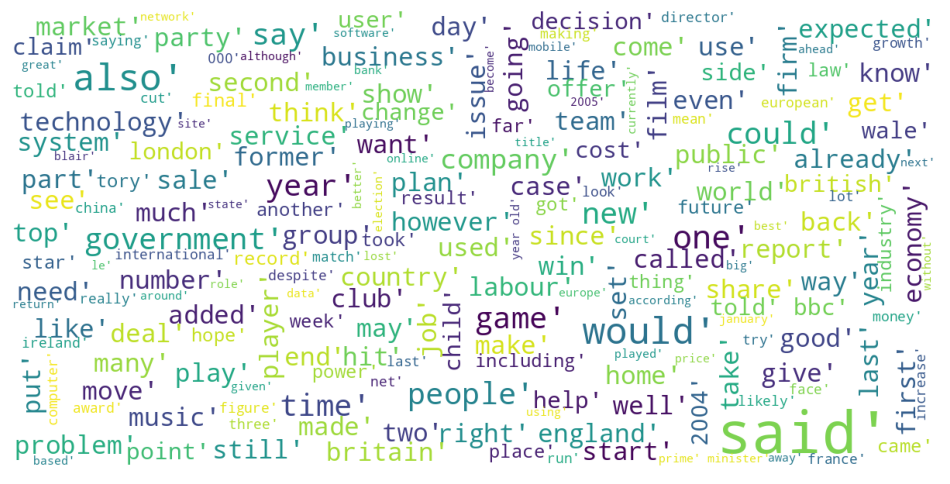

In [ ]:
def plot_wordcloud(data):
    stop=set(stopwords.words('english'))
    def _preprocess_text(data):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()                                                 #combines a word's several inflected forms into a single item for analysis.
        for news in data:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus

    corpus=_preprocess_text(data)

    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=200,
        max_font_size=25,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(corpus))                                   #a visual representation of text data.

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()
plot_wordcloud(bbc_text['News_Headline'])

# Tokenization and Stemming


*1)Stemming is a process that stems or removes last few characters from a word, often leading to incorrect meanings and spelling.
2)Lemmatization considers the context and converts the word to its meaningful base form.*

In [ ]:
bbc_text = bbc_text.apply(lambda x: x.astype(str).str.lower())
bbc_text.head()

,category,News_Headline
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
bbc_text['text_clean'] = bbc_text['News_Headline'].apply(nltk.word_tokenize)
bbc_text.head()


,category,News_Headline,text_clean
0,tech,tv future in the hands of viewers with home th...,"[tv, future, in, the, hands, of, viewers, with..."
1,business,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, alone, former, w..."
2,sport,tigers wary of farrell gamble leicester say ...,"[tigers, wary, of, farrell, gamble, leicester,..."
3,sport,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, in, fa, cup, premie..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, s, twelve, raids, box, office, ocean, ..."


In [ ]:
if len(bbc_text)==1:
  stop_words = set(stopwords.words('english'))                                  #set of commonly used words to be removed from orginal text
  word_tokens = bbc_text.text_clean
  filtered_sentence = [w for w in word_tokens if not w in stop_words]
  filtered_sentence = []
  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)
else:
  stop_words=set(nltk.corpus.stopwords.words("english"))
  bbc_text['text_clean'] = bbc_text['text_clean'].apply(lambda x: [item for item in x if item not in stop_words])

  print(bbc_text.head(5))

        category                                      News_Headline  \
0           tech  tv future in the hands of viewers with home th...   
1       business  worldcom boss  left books alone  former worldc...   
2          sport  tigers wary of farrell  gamble  leicester say ...   
3          sport  yeading face newcastle in fa cup premiership s...   
4  entertainment  ocean s twelve raids box office ocean s twelve...   

                                          text_clean  
0  [tv, future, hands, viewers, home, theatre, sy...  
1  [worldcom, boss, left, books, alone, former, w...  
2  [tigers, wary, farrell, gamble, leicester, say...  
3  [yeading, face, newcastle, fa, cup, premiershi...  
4  [ocean, twelve, raids, box, office, ocean, twe...  


In [ ]:
stemmer = PorterStemmer()
bbc_text["text_clean"] = bbc_text["text_clean"].apply(lambda x: [stemmer.stem(y) for y in x]) # used to reduce an inflected word down to its word stem.

In [ ]:
for _,row in bbc_text.iterrows():
  row['text_clean'] =' '.join(row['text_clean'])
bbc_text.head()

,category,News_Headline,text_clean
0,tech,tv future in the hands of viewers with home th...,tv futur hand viewer home theatr system plasma...
1,business,worldcom boss left books alone former worldc...,worldcom boss left book alon former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,tiger wari farrel gambl leicest say rush make ...
3,sport,yeading face newcastle in fa cup premiership s...,yead face newcastl fa cup premiership side new...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelv raid box offic ocean twelv crime c...


# TF - IDF and Vectoriazing

*Term Frequency - Inverse Document Frequency : Measures how important a term is within a dataset relative to a corpus

In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))

tf_idf1 = tf_idf.fit_transform(bbc_text['text_clean'])

tf_idf1

<1370x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 109702 stored elements in Compressed Sparse Row format>

In [ ]:
bbc_text.category = bbc_text.category.map({'tech':0, 'business':1, 'sport':2, 'entertainment':3, 'politics':4})
bbc_text.category.unique()


array([0, 1, 2, 3, 4])

In [ ]:
X = bbc_text.text_clean
y = bbc_text.category
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size=0.2,stratify=y)


Creating the Bag of Words Representation

We'll use the bag of words representation for each sentence

works by breaking sentence in individual words and putting them all in a bag. Then we pick all the unique words from the bag one by one and make a dictionary of unique words.

=> Vectorization of words applied using CountVectorizer

In [ ]:
vector = CountVectorizer(stop_words = 'english',lowercase=False)                # CountVectorizer : converts text to numerical data

# fit the vectorizer on the training data
vec = vector.fit(X_train)
vector.vocabulary_
X_transformed = vector.transform(X_train)
X_transformed.toarray()
# for test data
X_test_transformed = vector.transform(X_test)
#save the vectorizer
pickle.dump(vec, open("vector.pkl", "wb"))


# Training the Models





In [ ]:
logistic_reg = LogisticRegression()
lr = logistic_reg.fit(X_transformed, y_train)

LogisticRegression()


LogisticRegression()

In [ ]:
rf = RandomForestClassifier()

rf.fit(X_transformed, y_train)
RandomForestClassifier()

RandomForestClassifier()

In [ ]:
#Uses the bag-of-words feature extraction technique for document
naivebayes = MultinomialNB()
naivebayes.fit(X_transformed, y_train)


MultinomialNB()

In [ ]:
svm = LinearSVC()
svm.fit(X_transformed, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

# precision --- recall  --- f1-score ---    support


1) Precision : number of true positives /over the number of true positives + number of false positives

2)Recall : number of true positives / over the number of true positives + number of false negatives

3) F1-Score : another way to calculate an “average”, measure combining both precision and recall

4) Support : number of samples of the true response that lie in that class

In [ ]:
print('\t\t     Logistic Regression Model')
print(classification_report(lr.predict(X_test_transformed), y_test))
print('\n\n\n')
print('\t\t     Random Forest Classifier Model')
print(classification_report(rf.predict(X_test_transformed), y_test))
print('\n')
print('Random Forest Classifier Confusion Matrix ')
print(confusion_matrix(rf.predict(X_test_transformed), y_test))
print('\n\t\t    naivebayes Model')
print(classification_report(naivebayes.predict(X_test_transformed), y_test))
print('\n')

print('\t naivebayes  Confusion Matrix ')
print(confusion_matrix(naivebayes.predict(X_test_transformed), y_test))



		     Logistic Regression Model
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        47
           1       1.00      0.94      0.97        69
           2       1.00      0.97      0.98        65
           3       0.94      1.00      0.97        46
           4       0.94      0.98      0.96        47

    accuracy                           0.97       274
   macro avg       0.97      0.97      0.97       274
weighted avg       0.97      0.97      0.97       274





		     Random Forest Classifier Model
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        42
           1       1.00      0.87      0.93        75
           2       1.00      0.95      0.98        66
           3       0.92      0.98      0.95        46
           4       0.90      0.98      0.94        45

    accuracy                           0.95       274
   macro avg       0.94      0.96      0.94       274
we

# Naïve Bayes Testing

In [ ]:
headline = ['The battle between Imran Khans supporters and the powerful Pakistani military has this week been raging on two fronts - on the streets and on social media. And on one battlefield, the former prime minister seems to have the upper hand.']
vec = vector.transform(headline).toarray()
print('Headline:', headline)
print(str(list(naivebayes.predict(vec))[0]).replace('0', 'TECH').replace('1', 'BUSINESS').replace('2', 'SPORTS').replace('3','ENTERTAINMENT').replace('4','POLITICS'))


Headline: ['The battle between Imran Khans supporters and the powerful Pakistani military has this week been raging on two fronts - on the streets and on social media. And on one battlefield, the former prime minister seems to have the upper hand.']
POLITICS


In [ ]:
headline = ['Need to restart economy but with caution: Yogi Adityanath at E-Agenda AajTak']
vec = vector.transform(headline).toarray()
print('Headline:', headline)
print(str(list(naivebayes.predict(vec))[0]).replace('0', 'TECH').replace('1', 'BUSINESS').replace('2', 'SPORTS').replace('3','ENTERTAINMENT').replace('4','POLITICS'))


Headline: ['Need to restart economy but with caution: Yogi Adityanath at E-Agenda AajTak']
TECH


In [ ]:
headline = ['If I bat for an hour, you will see a big one: How Dravid spelt doom for Pak']
vec = vector.transform(headline).toarray()
print('Headline:', headline)
print(str(list(naivebayes.predict(vec))[0]).replace('0', 'TECH').replace('1', 'BUSINESS').replace('2', 'SPORTS').replace('3','ENTERTAINMENT').replace('4','POLITICS'))


Headline: ['If I bat for an hour, you will see a big one: How Dravid spelt doom for Pak']
TECH


In [ ]:
headline = ["Taylor Swift movies and songs is the best"]
vec = vector.transform(headline).toarray()
print('Headline:', headline)
print(str(list(naivebayes.predict(vec))[0]).replace('0', 'TECH').replace('1', 'BUSINESS').replace('2', 'SPORTS').replace('3','ENTERTAINMENT').replace('4','POLITICS'))


Headline: ['Taylor Swift movies and songs is the best']
ENTERTAINMENT


In [ ]:
headline = ['Portugal crash out of FIFA World Cup 2022, Ronaldo in tears']
vec = vector.transform(headline).toarray()
print('Headline:', headline)
print(str(list(naivebayes.predict(vec))[0]).replace('0', 'TECH').replace('1', 'BUSINESS').replace('2', 'SPORTS').replace('3','ENTERTAINMENT').replace('4','POLITICS'))


Headline: ['Portugal crash out of FIFA World Cup 2022, Ronaldo in tears']
SPORTS


# Save All the Models in Pickle Format

In [ ]:

pickle.dump(tf_idf, open("tfidf.pkl", "wb"))
pickle.dump(lr, open("lr.pkl", "wb"))
pickle.dump(rf, open("rf.pkl", "wb"))
pickle.dump(naivebayes, open("naivebayes.pkl", "wb"))
pickle.dump(svm, open("svm.pkl", "wb"))


#App inference

In [ ]:
%%writefile app.py

import streamlit as st
import joblib,os
import spacy
import pandas as pd
nlp = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use("Agg")
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from langdetect import detect


news_vectorizer = open("/content/vector.pkl","rb")
news_cv = joblib.load(news_vectorizer)



def load_prediction_models(model_file):
	loaded_model = joblib.load(open(os.path.join(model_file),"rb"))
	return loaded_model



# Get the Keys
def get_key(val,my_dict):
	for key,value in my_dict.items():
		if val == value:
			return key



def main():
  """News Classifier"""
  st.title("Welcome to the News Analysis Page. Still Improving...")

  html_temp = """
	<div style="background-color:red;padding:10px">
	<h1 style="color:white;text-align:center;"> News Classification App </h1>
	</div>

	"""
  st.markdown(html_temp,unsafe_allow_html=True)
  activity = ['Prediction']
  choice = st.sidebar.selectbox("Select Activity",activity)
  if choice == 'Prediction':
    st.info("Prediction with ML")
    news_text = st.text_area("Enter News Here","Type Here")
    en = detect(news_text)
    all_ml_models = ["lr","rf","naivebayes","svm"]
    model_choice = st.selectbox("Select Model",all_ml_models)
    prediction_labels = {'TECH': 0,'BUSINESS': 1,'SPORTS': 2,'ENTERTAINMENT': 3,'POLITICS': 4 }
    if st.button("Classify"):
      st.text("Original Text :\n{}".format(news_text))
      vect_text = news_cv.transform([news_text]).toarray()
      if model_choice == 'lr':
        predictor = load_prediction_models("/content/lr.pkl")
        prediction = predictor.predict(vect_text)

      elif model_choice == 'rf':
        predictor = load_prediction_models("/content/rf.pkl")
        prediction = predictor.predict(vect_text)

      elif model_choice == 'naivebayes':
        predictor = load_prediction_models("/content/naivebayes.pkl")
        prediction = predictor.predict(vect_text)

      elif model_choice == 'svm':
        predictor = load_prediction_models("/content/svm.pkl")
        prediction = predictor.predict(vect_text)
      if len(news_text) <= 5:
        st.success("This is not a valid news !!")
      elif en != 'en':
        st.success("Entered News Not in English , Enter News in English")

      else:
        final_result = get_key(prediction,prediction_labels)
        st.success("News Categorized as :   {}".format(final_result))



  st.sidebar.subheader("About")
  st.sidebar.write("Developed by : Shahd Tarek ")




if __name__ == '__main__':
	main()



Writing app.py


In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 6.006s
your url is: https://cute-states-flash.loca.lt
^C
